# Step 1 : Load and Preview the Data

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Dummy_Sales_Data.csv")

# Show first few rows
print(df.head())


  Order ID        Date   Product     Category  Sales  Quantity Customer  \
0  ORD1000  2023-01-01   Monitor  Accessories   1786         2  CUST500   
1  ORD1001  2023-01-02   Printer  Accessories   1061         3  CUST501   
2  ORD1002  2023-01-03  Keyboard  Accessories   1762         2  CUST502   
3  ORD1003  2023-01-04   Printer  Electronics    254         3  CUST503   
4  ORD1004  2023-01-05   Printer  Electronics    589         7  CUST504   

  Region  Profit  
0   East     -76  
1  South     479  
2  South     293  
3  South     -34  
4  South     132  


# Step 2 : Clean and Explore the Dataset

In [3]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("Dummy_Sales_Data.csv")

# Check the shape
print("Total records:", df.shape)

# Check data types & missing values
print("\nInfo:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

# Basic stats
print("\nDescriptive statistics:")
print(df.describe())


Total records: (200, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  200 non-null    object
 1   Date      200 non-null    object
 2   Product   200 non-null    object
 3   Category  200 non-null    object
 4   Sales     200 non-null    int64 
 5   Quantity  200 non-null    int64 
 6   Customer  200 non-null    object
 7   Region    200 non-null    object
 8   Profit    200 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 14.2+ KB
None

Missing values:
Order ID    0
Date        0
Product     0
Category    0
Sales       0
Quantity    0
Customer    0
Region      0
Profit      0
dtype: int64

Descriptive statistics:
             Sales    Quantity      Profit
count   200.000000  200.000000  200.000000
mean   1105.210000    4.890000  195.140000
std     520.807496    2.629156  173.844644
min     104.000000    1.000000 -100.00

# Step 3: Data Cleaning & Date Formatting

In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Confirm conversion
print(df.dtypes['Date'])


datetime64[ns]


In [5]:
# Extract Month, Year, and Month_Year
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Month_Year'] = df['Date'].dt.to_period('M')  # Useful for time-based analysis

# Step 4 : Sales Analysis

In [8]:
# Step 4: Product-wise Sales Analysis

# Top Products by Total Sales
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)
print("Top Products by Sales:\n", top_products)

# Step 4.1: Region-wise Sales
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print("\nSales by Region:\n", region_sales)

# Step 4.2: Monthly Sales Trend
monthly_sales = df.groupby("Month_Year")["Sales"].sum()
print("\nMonthly Sales Trend:\n", monthly_sales)

# Step 4.3: Product-wise Multi-Metric Summary
product_summary = df.groupby("Product")[["Sales", "Quantity"]].sum().sort_values(by="Sales", ascending=False)
print("\nProduct-wise Summary:\n", product_summary)


Top Products by Sales:
 Product
Laptop      52404
Monitor     50547
Keyboard    43928
Mouse       37566
Printer     36597
Name: Sales, dtype: int64

Sales by Region:
 Region
South    64364
East     58660
North    53965
West     44053
Name: Sales, dtype: int64

Monthly Sales Trend:
 Month_Year
2023-01    35173
2023-02    28907
2023-03    30692
2023-04    36713
2023-05    31338
2023-06    32996
2023-07    25223
Freq: M, Name: Sales, dtype: int64

Product-wise Summary:
           Sales  Quantity
Product                  
Laptop    52404       182
Monitor   50547       265
Keyboard  43928       184
Mouse     37566       149
Printer   36597       198


# Step 5 : Visualizations

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 5.1 : Top 5 Products by Sales - Bar Chart

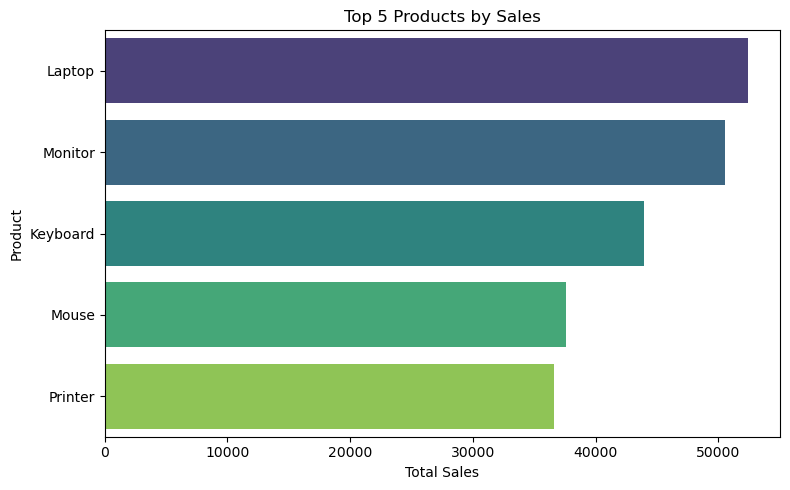

In [16]:
# Step 5.1: Top 5 Products by Sales
top5 = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top5.values, y=top5.index, palette="viridis")
plt.title("Top 5 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


# 5.2 : Sales by Region - Bar Chart

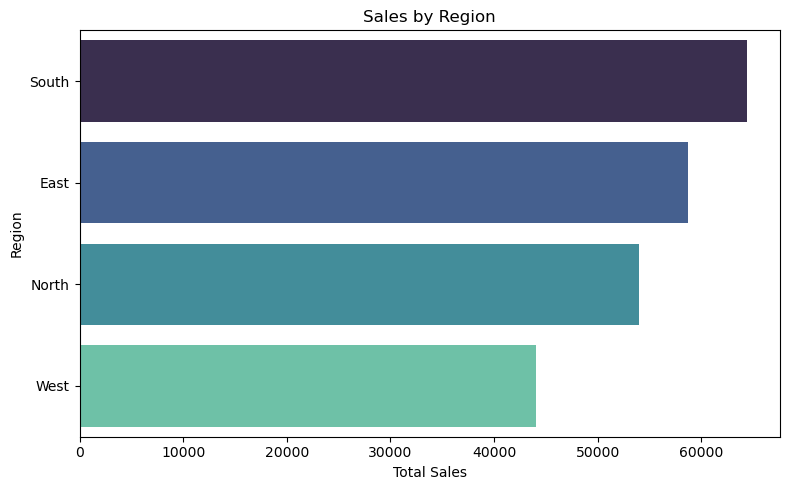

In [18]:
# Step 5.2: Region-wise Sales
region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region.values, y=region.index, palette="mako")
plt.title("Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# 5.3 : Monthly Sales Trend - Line Chart

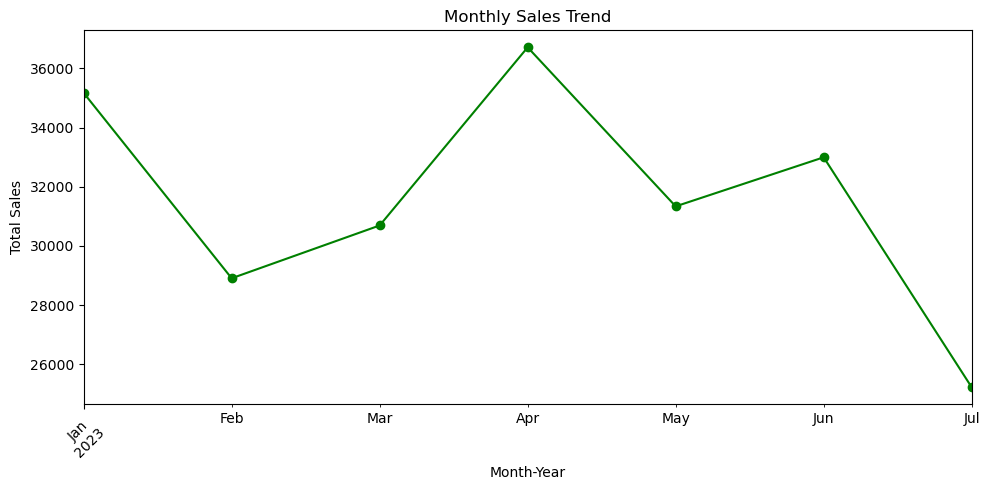

In [17]:
# Step 5.3: Monthly Sales Trend
monthly = df.groupby("Month_Year")["Sales"].sum()

plt.figure(figsize=(10,5))
monthly.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 6 : Insights

# Step 6.1 : Find Top 5 Products by Profit

In [20]:
df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(5)


Product
Monitor     8831
Mouse       8458
Laptop      8353
Keyboard    7636
Printer     5750
Name: Profit, dtype: int64

# Step 6.2: Compare it with Top 5 Products by Sales

In [21]:
df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)


Product
Laptop      52404
Monitor     50547
Keyboard    43928
Mouse       37566
Printer     36597
Name: Sales, dtype: int64

### Step 6: Insights

1. **Top-selling products** are Laptop, Monitor, and Keyboard.
2. **Highest sales regions** are South and East.
3. **Sales peaked in April**, followed by January and June.
4. Products with the highest sales did not always generate the highest profit — indicating the need to optimize pricing and discount strategies.
egy.
